<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/Learning_training_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:

model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10))

In [4]:
criterion = nn.CrossEntropyLoss()

# Get Data
images, labels = next(iter(trainloader))
# Flatten Images
images = images.view(images.shape[0], -1)

#Forward Pass
logits = model(images)

# Calculate Loss
loss = criterion(logits , labels)
print(loss)

tensor(2.3349, grad_fn=<NllLossBackward>)


In [5]:
# Build a feed-forward network with logsoftmax as output
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3152, grad_fn=<NllLossBackward>)


In [6]:
# Example of Autograd (backprop) with gradients

# Enable tracking of gradients
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-1.4056,  1.1540],
        [ 0.3115,  0.8777]], requires_grad=True)


In [7]:

y = x**2
print(y)

tensor([[1.9756, 1.3318],
        [0.0970, 0.7704]], grad_fn=<PowBackward0>)


In [8]:
print(y.grad_fn)

In [9]:
z = y.mean()
print(z)

tensor(1.0437, grad_fn=<MeanBackward0>)


In [10]:
print(x.grad)

None


In [11]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.7028,  0.5770],
        [ 0.1557,  0.4389]])
tensor([[-0.7028,  0.5770],
        [ 0.1557,  0.4389]], grad_fn=<DivBackward0>)


In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [13]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        ...,
        [-0.0082, -0.0082, -0.0082,  ..., -0.0082, -0.0082, -0.0082],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        [-0.0050, -0.0050, -0.0050,  ..., -0.0050, -0.0050, -0.0050]])


In [0]:
# Understanding optimizers
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0351, -0.0341, -0.0304,  ..., -0.0224, -0.0205, -0.0286],
        [ 0.0148,  0.0204, -0.0121,  ...,  0.0121, -0.0006,  0.0136],
        [ 0.0305, -0.0155, -0.0012,  ...,  0.0260,  0.0288, -0.0316],
        ...,
        [ 0.0175, -0.0040, -0.0306,  ..., -0.0230, -0.0014,  0.0206],
        [ 0.0340, -0.0179,  0.0211,  ...,  0.0049, -0.0189,  0.0100],
        [ 0.0093, -0.0328, -0.0158,  ..., -0.0145, -0.0164,  0.0074]],
       requires_grad=True)
Gradient - tensor([[ 2.7832e-03,  2.7832e-03,  2.7832e-03,  ...,  2.7832e-03,
          2.7832e-03,  2.7832e-03],
        [-5.1243e-05, -5.1243e-05, -5.1243e-05,  ..., -5.1243e-05,
         -5.1243e-05, -5.1243e-05],
        [ 5.9009e-04,  5.9009e-04,  5.9009e-04,  ...,  5.9009e-04,
          5.9009e-04,  5.9009e-04],
        ...,
        [-5.6239e-03, -5.6239e-03, -5.6239e-03,  ..., -5.6239e-03,
         -5.6239e-03, -5.6239e-03],
        [-3.7366e-03, -3.7366e-03, -3.7366e-03,  ..., -3.7366e

In [16]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0350, -0.0341, -0.0304,  ..., -0.0225, -0.0206, -0.0287],
        [ 0.0148,  0.0204, -0.0121,  ...,  0.0121, -0.0006,  0.0136],
        [ 0.0305, -0.0155, -0.0012,  ...,  0.0260,  0.0288, -0.0317],
        ...,
        [ 0.0176, -0.0040, -0.0305,  ..., -0.0229, -0.0013,  0.0207],
        [ 0.0340, -0.0179,  0.0211,  ...,  0.0049, -0.0189,  0.0100],
        [ 0.0093, -0.0328, -0.0157,  ..., -0.0145, -0.0164,  0.0074]],
       requires_grad=True)


In [0]:
# Real Training 
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [18]:
epochs = 5

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    
    optimizer.step()
    running_loss += loss
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8714208602905273
Training loss: 0.8384914398193359
Training loss: 0.5289672613143921
Training loss: 0.4310729205608368
Training loss: 0.38436052203178406


In [0]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)


In [20]:
ps

tensor([[1.9665e-07, 9.5613e-01, 5.3525e-03, 1.7157e-02, 4.5534e-05, 5.5225e-04,
         5.3459e-04, 4.4924e-04, 1.9276e-02, 5.0093e-04]])

In [0]:
args = ps.numpy()

In [22]:
args

array([[1.9664853e-07, 9.5613146e-01, 5.3525423e-03, 1.7157301e-02,
        4.5534176e-05, 5.5224873e-04, 5.3458748e-04, 4.4923864e-04,
        1.9276101e-02, 5.0092943e-04]], dtype=float32)

In [0]:
import numpy as np

In [0]:
argmax = np.argmax(args)

In [25]:
argmax

1

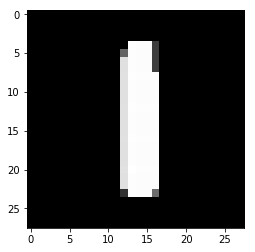

In [26]:
import matplotlib.pyplot as plt
img = img.view(1, 28, 28)
plt.imshow(img.numpy().squeeze(), cmap='Greys_r');